# Importing libraries

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [18]:
pwd

'C:\\Users\\Aman Bhalla\\Documents\\Codig Ninja project'

# Loading pandas data frame using using panda library

In [19]:
df = pd.read_csv(r'C:\\Users\\Aman Bhalla\\Documents\\Codig Ninja project\\startup_funding.csv' , encoding ='utf-8')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# Correcting spell errors in Startup Columns of the Data Frame

Converting all the strings in startup column to lower alphabet
Finding wrong spellings of major startup such as flipkart,oyo,ola and paytym
replacing incorrect values of the these start up in the Data Frame

In [20]:
df['StartupName'] = df['StartupName'].str.lower()
df['StartupName'].replace(['flipkart.com','flipkart'],'flipkart',inplace=True)
df['StartupName'].replace(['oyo rooms','oyorooms','oyo'],'oyo',inplace=True)
df['StartupName'].replace(['ola','ola cabs'],'ola',inplace=True)
df['StartupName'].replace(['paytm marketplace','paytm'],'paytm',inplace=True)

# Correcting spell errors in InvestmentType Columns of the Data Frame

In [21]:
invest_type = df['InvestmentType']
invest_type = invest_type.unique()
invest_type

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

## Correcting Spelling of Seed Funding, Private Equity and Crowd Funding in DataFrame

In [22]:
df['InvestmentType'].replace('SeedFunding',"Seed Funding",inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)


## keeping only rows having InvestmentType as  Crowding funding and Seed Funding

In [23]:
arr = df[['InvestorsName','InvestmentType','StartupName']]
arr1= arr[(arr['InvestmentType'] == 'Seed Funding') | (arr['InvestmentType'] == 'Crowd Funding')]
arr1


,InvestorsName,InvestmentType,StartupName
2,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,leverage edu
3,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,zepo
4,"Narottam Thudi, Shireesh Palle",Seed Funding,click2clinic
5,Reliance Corporate Advisory Services Ltd,Seed Funding,billion loans
11,"Blume Ventures, Contrarian Capital India Partn...",Seed Funding,minjar
...,...,...,...
2356,Michael & Susan Dell Foundation,Seed Funding,villgro
2357,Group of Angel Investors,Seed Funding,corporate360
2358,"August Capital Partners, Michael Blakey",Seed Funding,freshmonk
2362,"Inventus Capital Partners, IDG Ventures",Seed Funding,aasaanjobs


In [24]:
arr1.drop('InvestmentType',inplace=True,axis = 1)# dropping null values from data Frame and dropping column investment type
arr1

C:\Users\Aman Bhalla\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,InvestorsName,StartupName
2,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",leverage edu
3,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",zepo
4,"Narottam Thudi, Shireesh Palle",click2clinic
5,Reliance Corporate Advisory Services Ltd,billion loans
11,"Blume Ventures, Contrarian Capital India Partn...",minjar
...,...,...
2356,Michael & Susan Dell Foundation,villgro
2357,Group of Angel Investors,corporate360
2358,"August Capital Partners, Michael Blakey",freshmonk
2362,"Inventus Capital Partners, IDG Ventures",aasaanjobs


## Splitting the (, ) separated investors in Data Frame to new Data Frame

In [25]:
arr2 = arr1['InvestorsName'].str.split(',',expand=True)
arr2.columns =['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
arr2['StartupName'] = arr1['StartupName']# adding startup column in the data Frame
arr2

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,StartupName
2,Kashyap Deorah,Anand Sankeshwar,Deepak Jain,Sadashiva NT,Arjun Mehta,Satish Kaul,Anindya Ghose,None,None,None,leverage edu
3,Kunal Shah,LetsVenture,Anupam Mittal,Hetal Sonpal,None,None,None,None,None,None,zepo
4,Narottam Thudi,Shireesh Palle,None,None,None,None,None,None,None,None,click2clinic
5,Reliance Corporate Advisory Services Ltd,None,None,None,None,None,None,None,None,None,billion loans
11,Blume Ventures,Contrarian Capital India Partners,Emergent Ventures India,Pallav Nadhani,Ashish Gupta,Sharad Sharma,Sirion Labs,None,None,None,minjar
...,...,...,...,...,...,...,...,...,...,...,...
2356,Michael & Susan Dell Foundation,None,None,None,None,None,None,None,None,None,villgro
2357,Group of Angel Investors,None,None,None,None,None,None,None,None,None,corporate360
2358,August Capital Partners,Michael Blakey,None,None,None,None,None,None,None,None,freshmonk
2362,Inventus Capital Partners,IDG Ventures,None,None,None,None,None,None,None,None,aasaanjobs


In [26]:
#getting unique startupname values from the data frame
arr3 = arr2['StartupName'].unique()
arr3

array(['leverage edu', 'zepo', 'click2clinic', ..., 'freshmonk',
       'aasaanjobs', 'couponmachine.in'], dtype=object)

In [27]:
df1 = arr2.groupby('StartupName')#grouping by according to startup name

# Getting Unique investors of Every Startup 

Getting unique values from the arr2 and generating the df for each particular Startup Stripping the values From the each startup and strip them , then adding them into set so only unique investors are collected for a particular startup

In [28]:
# Creating List
l = []
for key in range(len(arr3)):
    df2 = df1.get_group(arr3[key])
    s = set()
    for i in range(len(df2)):
        for j in range(len(df2.columns)):
            if(type(df2.iloc[i,j])==str ):
                s.add(df2.iloc[i,j].strip())# adding elemnets to set
                t = list(s)# Converting set to list
            else:
                continue
    l.append(t)    #appending each list into another list list l
l

[['Satish Kaul',
  'Anand Sankeshwar',
  'Arjun Mehta',
  'leverage edu',
  'Sadashiva NT',
  'Kashyap Deorah',
  'Deepak Jain',
  'Anindya Ghose'],
 ['zepo', 'LetsVenture', 'Anupam Mittal', 'Kunal Shah', 'Hetal Sonpal'],
 ['Shireesh Palle', 'Narottam Thudi', 'click2clinic'],
 ['billion loans', 'Reliance Corporate Advisory Services Ltd'],
 ['Blume Ventures',
  'Emergent Ventures India',
  'Sirion Labs',
  'minjar',
  'Sharad Sharma',
  'Contrarian Capital India Partners',
  'Pallav Nadhani',
  'Ashish Gupta'],
 ['mycity4kids'],
 ['India Quotient', 'clip app', 'Shunwei Capital'],
 ['upwardly.in',
  'Suvo Sarkar',
  'Likemind Ventures',
  'Sreeram Iyer',
  'Anita Gupta'],
 ['Ankit Aditya',
  'Moksh Sports Ventures',
  'Venture Catalysts',
  'Sourav Ganguly',
  'flickstree'],
 ['Fireside Ventures',
  'Sidharth Pansari',
  'Apurva Salarpuria',
  'Sprout Capital',
  'design cafe'],
 ['Abhishek Gupta',
  'Purvi Capital',
  '500 Startups',
  'Rajan Anandan',
  'bottr.me'],
 ['arcatron', 'Indi

## Converting list of list into Dictionary

In [29]:
d = {}
for i in range(len(l)):
    for j in range(len(l[i])):
        temp = l[i][j]
        d[temp] = d.get(temp,0)+1


In [30]:
t = {}# taking another dictionary havng no null values from dictionary d
for i in d:
    if(i !=''): # removing null string 
        t[i]=d[i]
del t['Undisclosed Investors']# removing Undisclosed Investors
del t['Undisclosed investors']

##  getting top 5 unique investors who invest in crowd Funding and seed funding

In [31]:
from collections import Counter
dic = dict(Counter(t).most_common(5))
x = [] 
y= []
for i in dic:
    x.append(i) #Getting keys from dictionary
    y.append(dic[i])# Getting Freq of the values
    print(i,dic[i])


Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


# Graph of Unique Investor v/s the no. of times they invested

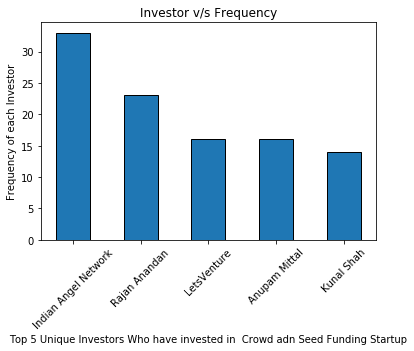

In [32]:
plt.bar(x,y,edgecolor ='black',width=0.5)
plt.xlabel('Top 5 Unique Investors Who have invested in  Crowd adn Seed Funding Startup')
plt.ylabel('Frequency of each Investor')
plt.xticks(rotation =45)
plt.title('Investor v/s Frequency')
plt.show()